In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score

#################################################
#Data set 2: Forest Type data set
import utils
X_train, X_test,y_train,y_test = utils.forest_preprocess()


Using TensorFlow backend.


Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vionwinnie/Documents/MachineLearning/hw3/utils.py:59: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  X_train_num = scaler.transform(X_train_num)
/home/vionwinnie/Documents/MachineLearning/hw3/utils.py:60: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  X_test_num = scaler.transform(X_test_num)


## KMeans Visualization

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.229195
For n_clusters = 7 The average silhouette_score is : 0.15134268735127063


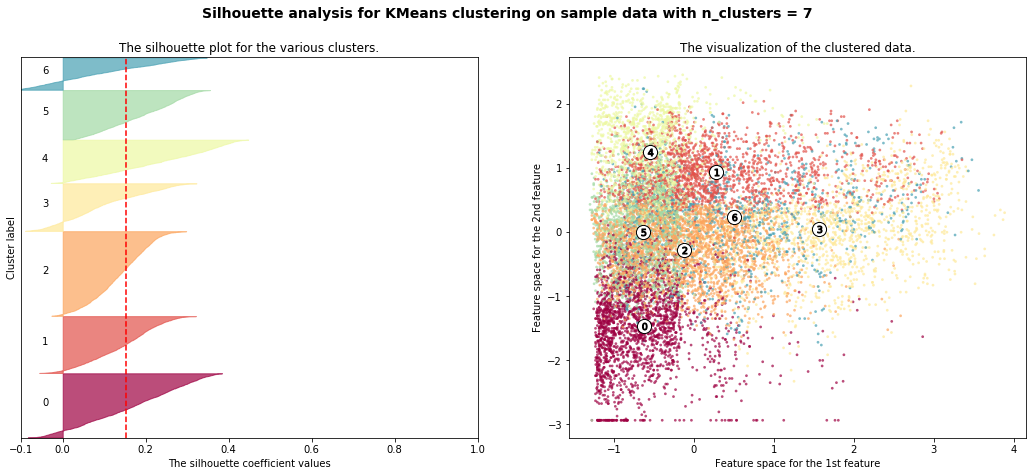

In [4]:
#################################################
#K means clustering

range_n_clusters = [7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X_train)
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)

        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)

    #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( X_train[:, 5], X_train[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 5], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter( c[5], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    title = 'Forest_K_means_{}.png'.format(n_clusters)
    fig.savefig(title, dpi=fig.dpi)
    


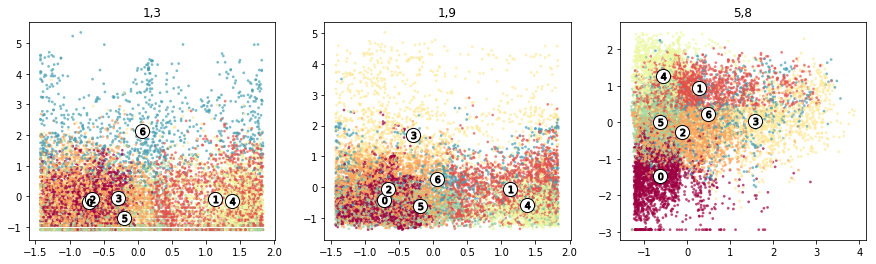

In [6]:
### Showing Various Features Space 
import itertools as it
#rounds = list(it.combinations(range(0,11), 2))
rounds = [(1,3),(1,9),(5,8)]

plt.figure(figsize=(15,4))

for i,selected in enumerate(rounds):
    plt.subplot(1,3,i+1)
    plt.scatter( X_train[:, selected[0]], X_train[:, selected[1]], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, selected[0]], centers[:, selected[1]], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter( c[selected[0]], c[selected[1]], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        
    plt.title("{},{}".format(selected[0],selected[1]))
plt.show()


/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.336577


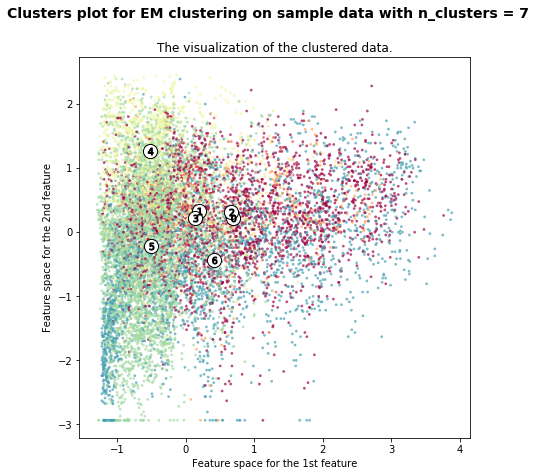

In [7]:
## EM Algo
from sklearn.mixture import GaussianMixture

range_n_clusters = [7]

for n_clusters in range_n_clusters:
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10).fit(X_train)
    cluster_labels = clusterer.predict(X_train)
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    plt.scatter( X_train[:, 5], X_train[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, 5], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter( c[5], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Clusters plot for EM clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    title = 'Forest_GaussianMixture_{}.png'.format(n_clusters)
    fig.savefig(title, dpi=fig.dpi)


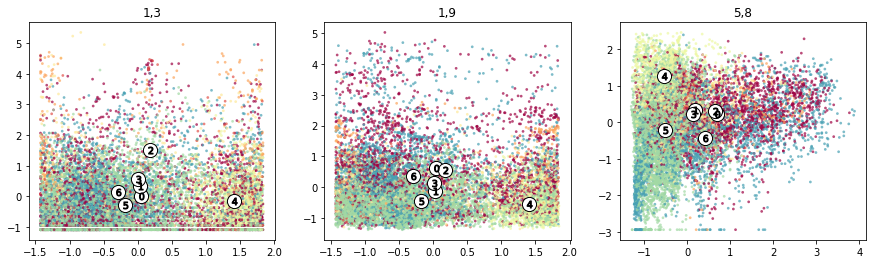

In [8]:
### Showing Various Features Space 
import itertools as it
#rounds = list(it.combinations(range(0,11), 2))
rounds = [(1,3),(1,9),(5,8)]

plt.figure(figsize=(15,4))

for i,selected in enumerate(rounds):
    plt.subplot(1,3,i+1)
    plt.scatter( X_train[:, selected[0]], X_train[:, selected[1]], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, selected[0]], centers[:, selected[1]], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        plt.scatter( c[selected[0]], c[selected[1]], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        
    plt.title("{},{}".format(selected[0],selected[1]))
plt.show()


In [173]:
#PCA feature transformation

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=11, random_state=10)
X_r = pca.fit(X_train).transform(X_train)
X_pca = X_r

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ["b","g","r","c","m","y","k"]
lw = 1
'''
for color, i in zip(colors, range(0,8)):
    print(color,i)
    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.8, lw=lw, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Forest Type dataset')
plt.xlabel("Value in 1st Component")
plt.ylabel("Value in 2nd component")
'''

explained variance ratio: [0.25262879 0.20710648 0.15757634 0.09487184 0.05202486 0.04344573
 0.03892473 0.02880131 0.02280156 0.02131758 0.01083256]


'\nfor color, i in zip(colors, range(0,8)):\n    print(color,i)\n    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 1], color=color, alpha=.8, lw=lw, label=i)\nplt.legend(loc=\'best\', shadow=False, scatterpoints=1)\nplt.title(\'PCA of Forest Type dataset\')\nplt.xlabel("Value in 1st Component")\nplt.ylabel("Value in 2nd component")\n'

<Figure size 432x288 with 0 Axes>

explained variance ratio: [2.52628794e-01 2.07106485e-01 1.57576341e-01 9.48718423e-02
 5.20248639e-02 4.34457330e-02 3.89247273e-02 2.88013146e-02
 2.28015647e-02 2.13175795e-02 1.08326391e-02 7.42936805e-03
 5.40042406e-03 4.52705917e-03 4.15741220e-03 3.99015470e-03
 3.76830299e-03 3.64873386e-03 3.62047843e-03 3.43258260e-03
 3.25470382e-03 2.95014052e-03 2.51269144e-03 2.37765311e-03
 2.17417680e-03 2.09471670e-03 2.01905733e-03 1.82212584e-03
 1.65232270e-03 1.51316350e-03 1.14159132e-03 9.88148165e-04
 9.23671218e-04 8.04559314e-04 6.55221240e-04 6.46856251e-04
 3.97267818e-04 3.09211536e-04 2.81572243e-04 2.72745078e-04
 2.62452026e-04 1.84056623e-04 1.09412946e-04 8.70818466e-05
 6.87673792e-05 6.34903358e-05 6.27166436e-05 5.67493016e-05
 7.27611245e-06 4.98222449e-32 9.76097559e-34 9.76097559e-34
 9.76097559e-34]


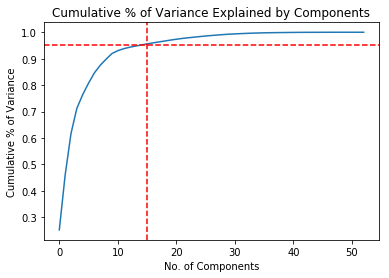

In [148]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=53, random_state=10)
X_r = pca.fit(X_train).transform(X_train)
X_pca = X_r

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ["b","g","r","c","m","y","k"]
lw = 1

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative % of Variance Explained by Components')
plt.xlabel("No. of Components")
plt.ylabel("Cumulative % of Variance")
plt.axhline(y=0.95,c='r',linestyle='--')
plt.axvline(x=15,c='r',linestyle='--')


[2.93431909 2.40557104 1.83027144 1.10194983 0.60427613 0.50462832
 0.4521162  0.33453133 0.26484338 0.24760669 0.12582168]


{'boxes': [<matplotlib.lines.Line2D at 0x7fd5a5c0f4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd5a5c0fa20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd5a5c37b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd5a5c379b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd5a5c0f5f8>,
  <matplotlib.lines.Line2D at 0x7fd5a5c0fb00>]}

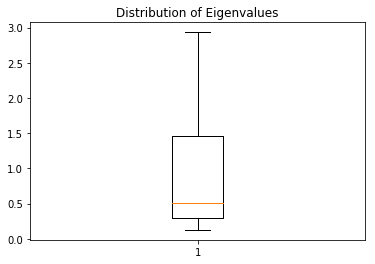

In [171]:
eigenvalues = pca.explained_variance_
print(eigenvalues)
plt.figure()
plt.title('Distribution of Eigenvalues')
plt.boxplot(eigenvalues)

## ICA Visualization

In [172]:
from scipy.stats import kurtosis, skew

avg_kurt = []
for component in range(1,55):
    #ICA feature transformation    
    ica = FastICA(n_components=component, random_state=10,max_iter=1000)
    X_r = ica.fit(X_train).transform(X_train)
    X_ica = X_r
    
    avg_kurt.append(np.median(np.apply_along_axis(kurtosis, 0, X_ica)))

plt.plot(avg_kurt)
plt.title('Choosing number of components')
plt.xlabel('No. of components')
plt.ylabel('Average Kurtosis across IC')


/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


KeyboardInterrupt: 

## Randomized Projection

In [175]:
#Random Projection feature transformation

rca = GaussianRandomProjection(n_components=5, random_state=10)
X_r = rca.fit_transform(X_train)
X_rca = X_r



'\nplt.figure()\ncolors = ["b","g","r","c","m","y","k"]\nlw = 2\n\nfor color, i in zip(colors, range(0,8)):\n    plt.scatter(X_r[y_train == i, 0], X_r[y_train == i, 2], color=color, alpha=.8, lw=lw, label=i)\nplt.legend(loc=\'best\', shadow=False, scatterpoints=1)\nplt.title(\'Random Projection of Wine Quality dataset\')\nplt.xlabel("Value in 1st Component")\nplt.ylabel("Value in 2nd component")\n'

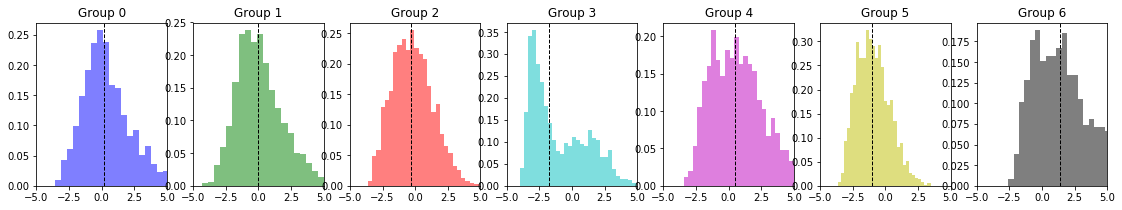

In [158]:
#Random Projection feature transformation
rca = GaussianRandomProjection(n_components=5, random_state=0)
X_r = rca.fit_transform(X_train)
X_rca = X_r

plt.figure(figsize=(22,3))

for i in range(0,7):
    plt.subplot(1,8,i+1)
    plt.hist(X_r[y_train == i,0],density=True,alpha=0.5,color=colors[i],bins=30)
    plt.axvline(np.median(X_r[y_train == i,0]), color='k', linestyle='dashed', linewidth=1)
    plt.title('Group {}'.format(i))
    plt.xlim(-5,5)

## Feature Selection (n=5)

<Figure size 432x288 with 0 Axes>

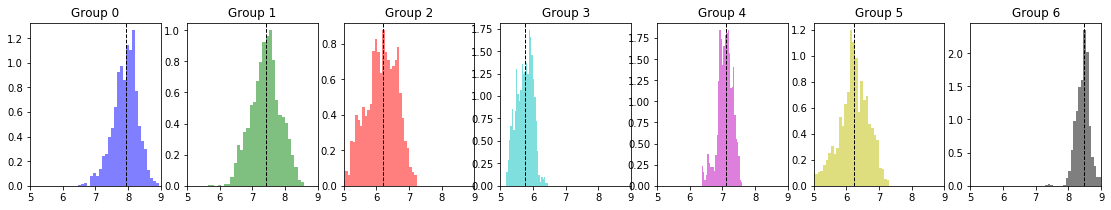

In [162]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

clf = SelectKBest(chi2, k=5)

X_new = clf.fit_transform(X_train+7, y_train)
X_fs = X_new

plt.figure()
colors = ["b","g","r","c","m","y","k"]
lw = 2

plt.figure(figsize=(22,3))
plt.title('Chi square feature selection of Forest Type dataset')

for i in range(0,7):
    plt.subplot(1,8,i+1)
    plt.hist(X_fs[y_train == i,0],density=True,alpha=0.5,color=colors[i],bins=30)
    plt.axvline(np.median(X_fs[y_train == i,0]), color='k', linestyle='dashed', linewidth=1)
    plt.title('Group {}'.format(i))
    plt.xlim(5,9)
    

In [176]:
#Feature selection method of my choice:
# Univariate feature selection (K best)

from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

clf = SelectKBest(chi2, k=5)

X_new = clf.fit_transform(X_train+7, y_train)
X_fs = X_new

'''
plt.figure()
colors = ["b","g","r","c","m","y","k"]
lw = 2

for color, i in zip(colors, range(0,8)):
    plt.scatter(X_new[y_train == i, 0], X_new[y_train == i, 1], color=color, alpha=.8, lw=lw, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Chi square feature selection of Forest Type dataset')
'''

'\nplt.figure()\ncolors = ["b","g","r","c","m","y","k"]\nlw = 2\n\nfor color, i in zip(colors, range(0,8)):\n    plt.scatter(X_new[y_train == i, 0], X_new[y_train == i, 1], color=color, alpha=.8, lw=lw, label=i)\nplt.legend(loc=\'best\', shadow=False, scatterpoints=1)\nplt.title(\'Chi square feature selection of Forest Type dataset\')\n'

In [62]:
significance = clf.pvalues_
np.where(significance < 1e-5)

(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 23]),)

In [177]:
all_data = [X_pca,X_ica,X_rca,X_fs]
names = ['PCA','ICA','RCA','FS']

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.227533
For n_clusters = 7 The average silhouette_score is : 0.1695887477683733


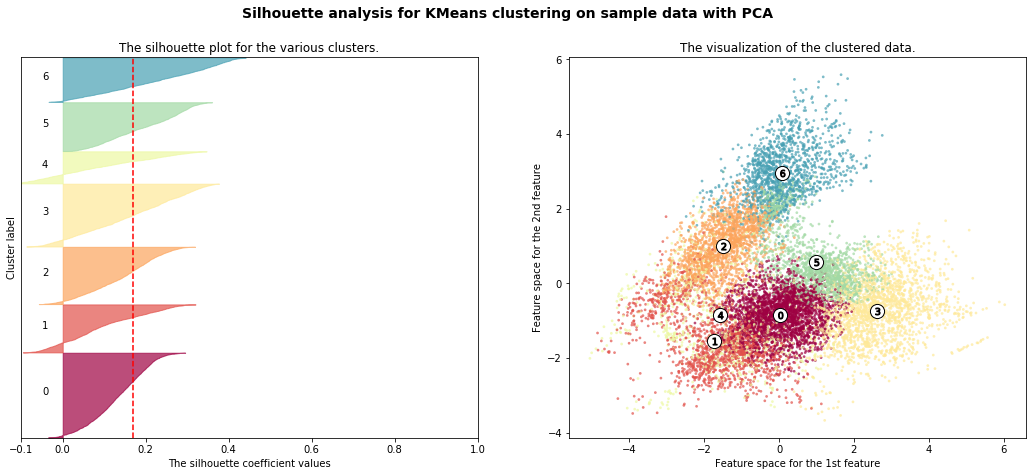

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.112331
For n_clusters = 7 The average silhouette_score is : 0.03041330996134058


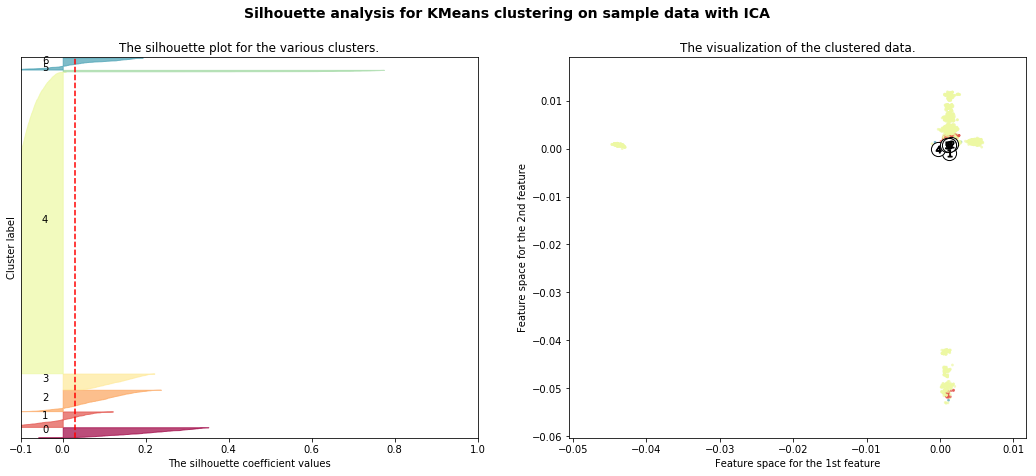

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.065546
For n_clusters = 7 The average silhouette_score is : 0.18077722084653347


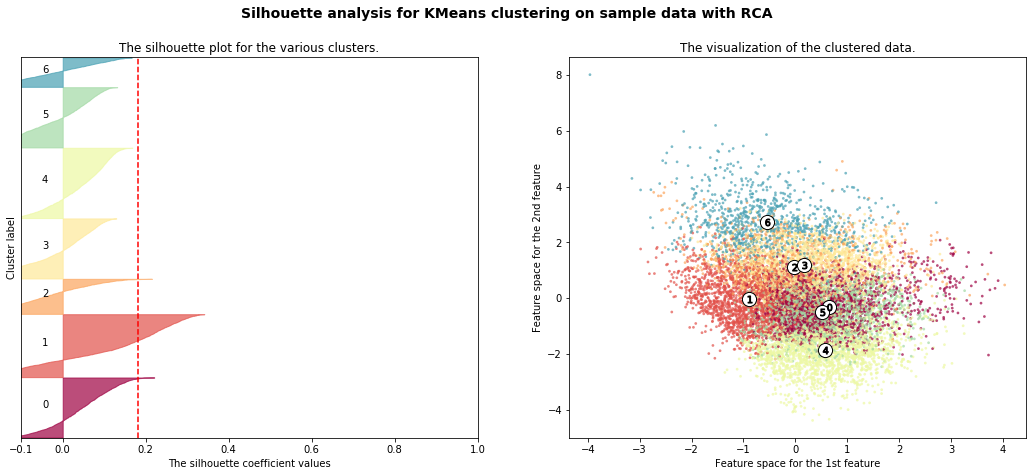

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.335747
For n_clusters = 7 The average silhouette_score is : 0.2675501823226301


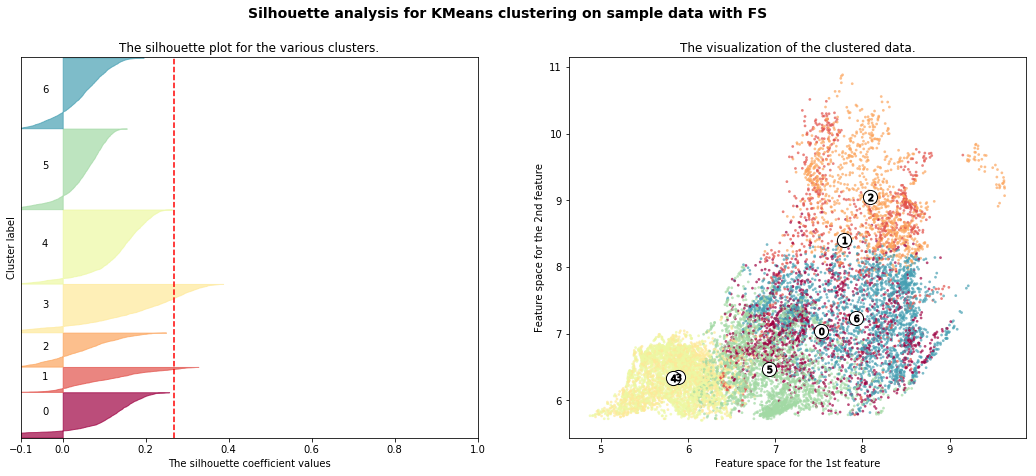

In [178]:
#################################################
#K means clustering

for data,method in zip(all_data,names):
    
    n_clusters=7

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(data)
    cluster_labels = clusterer.labels_
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)

        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)

    #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter( data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter( c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with {}".format(method)),
                 fontsize=14, fontweight='bold')

    plt.show()

    title = 'Forest_7class_PCA_K_means_{}.png'.format(method)
    fig.savefig(title, dpi=fig.dpi)
    


/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.247854


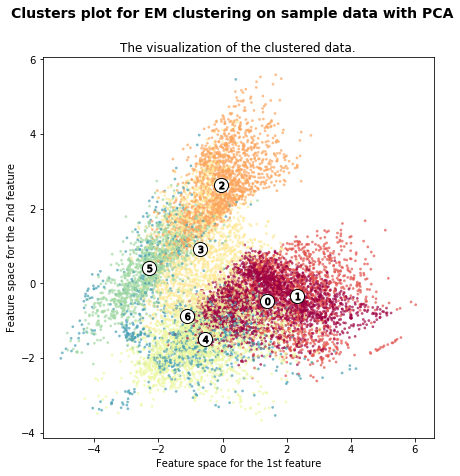

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.206232


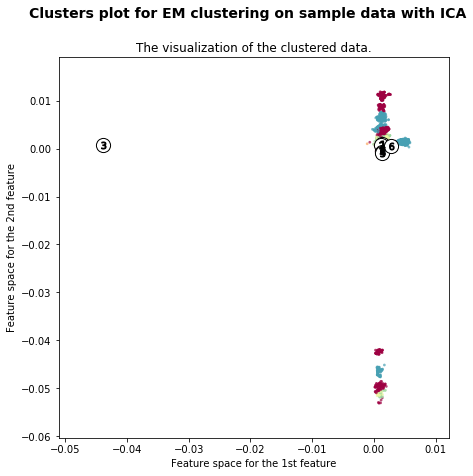

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.078078


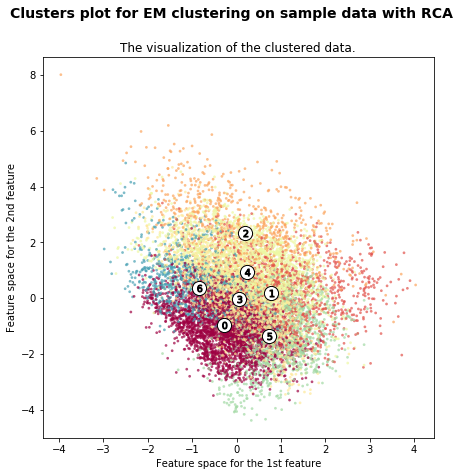

/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


NMI score: 0.329456


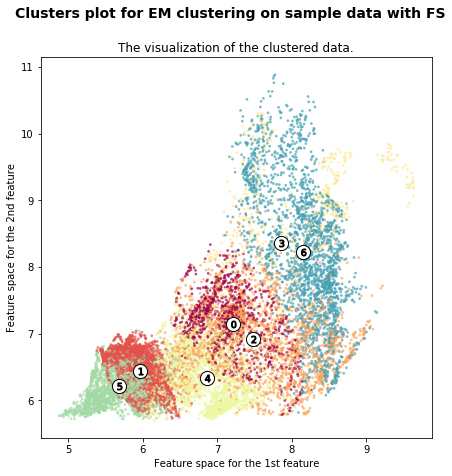

In [179]:
from sklearn.mixture import GaussianMixture

n_clusters=7

for data,method in zip(all_data,names):
    
    fig = plt.gcf()
    fig.set_size_inches(7, 7)
    ax = fig.add_subplot(111)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=20).fit(data)
    cluster_labels = clusterer.predict(data)
    print("NMI score: %.6f" % normalized_mutual_info_score(y_train, cluster_labels))

    # 2nd Plot showing the actual clusters formed
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    plt.scatter( data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_

    # Draw white circles at cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter( c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Clusters plot for EM clustering on sample data "
                  "with {}".format(method)),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    title = 'Forest_7Class_GaussianMixture_{}.png'.format(method)
    fig.savefig(title, dpi=fig.dpi)


/home/vionwinnie/miniconda3/envs/cs6476p6/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


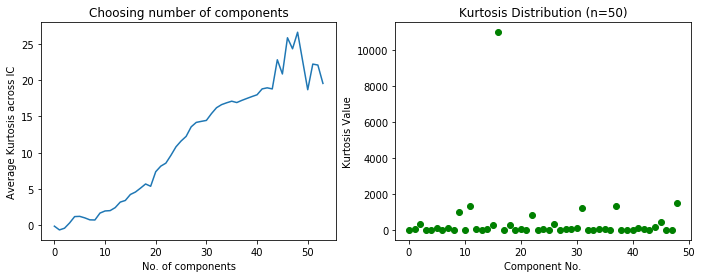

In [151]:
from scipy.stats import kurtosis, skew

plt.figure(figsize=(18,4))

'''
avg_kurt = []
for component in range(1,12):
    #ICA feature transformation    
    ica = FastICA(n_components=component, random_state=10)
    X_r = ica.fit(X_train).transform(X_train)
    X_ica = X_r
    
    avg_kurt.append(np.mean(np.apply_along_axis(kurtosis, 0, X_ica)))
'''
plt.subplot(1,3,1)
plt.title('Choosing number of components')
plt.xlabel('No. of components')
plt.ylabel('Average Kurtosis across IC')
plt.plot(avg_kurt)


#ICA feature transformation
    
ica = FastICA(n_components=49, random_state=10,max_iter=1000)
X_r = ica.fit(X_train).transform(X_train)
X_ica = X_r

plt.subplot(1,3,2)

colors = ["b","g","r","c","m","y","k"]
lw = 1
'''
for color, i in zip(colors, range(0,8)):
    plt.scatter(X_r[y_train == i, 3], X_r[y_train == i, 10], color=color, alpha=.8, lw=lw, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('ICA of Wine Quality dataset')
plt.xlabel("Value in 1st Component")
plt.ylabel("Value in 2nd component")
'''

import numpy as np

plt.subplot(1,3,2)
plt.title('Kurtosis Distribution (n=50)')
kurts = np.apply_along_axis(kurtosis, 0, X_ica)
plt.scatter(range(0,49),kurts,c='g')
plt.ylabel('Kurtosis Value')
plt.xlabel('Component No.')

plt.show()